## Problem 2. Discrimination power of logistic regression

Write a linear line and a quadratic line for regression.

reference: [Logistic Regression in Python](https://www.youtube.com/watch?v=NtjAeXppomA)

(1.8, 10.2)

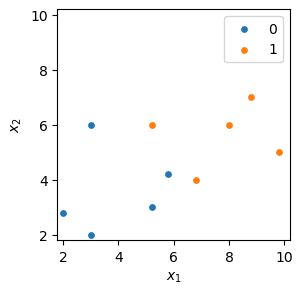

In [3]:
# import our data
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[3.,2.],[2.,2.8],[5.2,3.],[6.8,4.],[5.8,4.2],[9.8,5.],[3.,6.],[5.2,6],[8.,6.],[8.8,7.]])
y = np.array([0,0,0,1,0,1,0,1,1,1])

f = plt.figure()
f.set_figwidth(3)
f.set_figheight(3)

for label in set(y):
    mask = y==label
    plt.scatter(x[:,0][mask], x[:,1][mask], marker = '.', s=60, label = int(label))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([1.8,10.2])
plt.ylim([1.8,10.2])

In [4]:
import numpy as np

def sigmoid(z):
    return 1./(1.+np.exp(-z))

# cost function
# -1*sum(y.np.log(y_pred(w,x)) + (1-y)*np.log(1-y_pred(w,x)))

### Linear Logistic Regression

Data ponts: $\vec x^i=(x_1^i,x_2^i)$. Set the linear function as $f(\vec x)=w_0+w_1x_1+w_2x_2$, where $\vec w=(w_0,w_1,w_2)$ are the parameters. The discriminating line is $f(\vec x)=0$. The probability that $\vec x$ belongs to catagory $1$ is $P(y^i=1|\vec x^i)=\sigma(w_0+w_1x_1^i+w_2x_2^i)$, denoted as $\hat y_i^i=\sigma(z^i)$. 

Then the cost function is $\displaystyle c(\vec w)=\sum_i -y^i\ln\hat y^i-(1-y^i)\ln\hat(1-\hat y^i)$. The partial derivatives of the cost function w.r.t. parameters are $\displaystyle\frac{\partial c}{\partial w_0}=\sum_i -y^i(1-\hat y^i)+(1-y^i)\hat y^i$, $\displaystyle\frac{\partial c}{\partial w_1}=\sum_i -y^i(1-\hat y^i)x_1^i+(1-y^i)\hat y^ix_1^i$, $\displaystyle\frac{\partial c}{\partial w_2}=\sum_i -y^i(1-\hat y^i)x_2^i+(1-y^i)\hat y^ix_2^i$. 

In [5]:
# prediction given by our model
def y_pred(w, x):
    z = np.array(w[0] + w[1]*x[:,0] + w[2]*x[:,1])
    return sigmoid(z)

# gradient: partial derivatives of cost funtion
def gradient(w, x, y):
    g = np.zeros(3)
    g[0] = -1*sum(y*(1-y_pred(w,x)) - (1-y)*y_pred(w,x))
    g[1] = -1*sum(y*(1-y_pred(w,x))*x[:,0] - (1-y)*y_pred(w,x)*x[:,0])
    g[2] = -1*sum(y*(1-y_pred(w,x))*x[:,1] - (1-y)*y_pred(w,x)*x[:,1])
    return g

# descent for one step
def descent(w, x, y, learning_rate):
    g = gradient(w,x,y)
    w_new = np.zeros(3)
    w_new[0] = w[0] - learning_rate*g[0]
    w_new[1] = w[1] - learning_rate*g[1]
    w_new[2] = w[2] - learning_rate*g[2]
    return w_new

# initialize (randomly)
w = np.array([0,0,0])

err = 1
while err > 1e-6:
    w_new = descent(w,x,y,0.009)
    err = sum((w - w_new)**2)
    w = w_new

(1.8, 10.2)

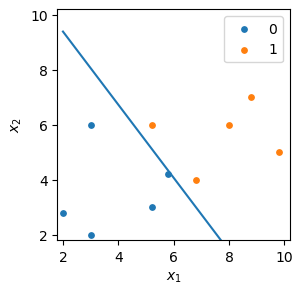

In [ ]:
# plotting
import matplotlib.pyplot as plt

x_1_dot = np.linspace(2,10,100)
x_2_dot = -w[0]/w[2]-w[1]/w[2]*x_1_dot

f = plt.figure()
f.set_figwidth(3)
f.set_figheight(3)

for label in set(y):
    mask = y==label
    plt.scatter(x[:,0][mask], x[:,1][mask], marker = '.', s=60, label = int(label))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(x_1_dot, x_2_dot)
plt.xlim([1.8,10.2])
plt.ylim([1.8,10.2])

### Quadratic Logistic Regression

In [7]:
# prediction given by our model
def y_pred(w, x):
    z = np.array(w[0] + w[1]*x[:,0] + w[2]*x[:,1] + w[3]*x[:,0]**2 + w[4]*x[:,1]**2 + w[5]*x[:,0]*x[:,1])
    return sigmoid(z)

# gradient: partial derivatives of cost funtion
def gradient(w, x, y):
    g = np.zeros(6)
    g[0] = -1*sum(y*(1-y_pred(w,x)) - (1-y)*y_pred(w,x))
    g[1] = -1*sum(y*(1-y_pred(w,x))*x[:,0] - (1-y)*y_pred(w,x)*x[:,0])
    g[2] = -1*sum(y*(1-y_pred(w,x))*x[:,1] - (1-y)*y_pred(w,x)*x[:,1])
    g[3] = -1*sum(y*(1-y_pred(w,x))*x[:,0]**2 - (1-y)*y_pred(w,x)*x[:,0]**2)
    g[4] = -1*sum(y*(1-y_pred(w,x))*x[:,1]**2 - (1-y)*y_pred(w,x)*x[:,1]**2)
    g[5] = -1*sum(y*(1-y_pred(w,x))*x[:,0]*x[:,1] - (1-y)*y_pred(w,x)*x[:,0]*x[:,1])        
    return g

# descent for one step
def descent(w, x, y, learning_rate):
    g = gradient(w,x,y)
    w_new = np.zeros(6)
    w_new[0] = w[0] - learning_rate*g[0]
    w_new[1] = w[1] - learning_rate*g[1]
    w_new[2] = w[2] - learning_rate*g[2]
    w_new[3] = w[3] - learning_rate*g[3]
    w_new[4] = w[4] - learning_rate*g[4]
    w_new[5] = w[5] - learning_rate*g[5]
    return w_new

# initialize (randomly)
w = np.array([0,0,0,0,0,0])

err = 1
while err > 1e-6:
    w_new = descent(w,x,y,0.009)
    err = sum((w - w_new)**2)
    w = w_new

/var/folders/gv/v5_pzg5j53n7pshcq8rj8ky80000gn/T/ipykernel_1645/1940454336.py:14: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  root = fsolve(func, (2,100))
/var/folders/gv/v5_pzg5j53n7pshcq8rj8ky80000gn/T/ipykernel_1645/1940454336.py:14: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  root = fsolve(func, (2,100))


(1.8, 10.2)

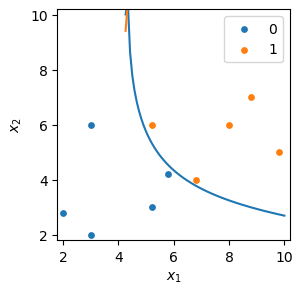

In [ ]:
# plotting
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

x_1_dot = np.linspace(2,10,100)
x_2_dot = np.zeros(200)
x_2_dot = np.reshape(x_2_dot,(100,2))

def func(x):
    return w[0] + w[1]*x_1 + w[2]*x + w[3]*x_1**2 + w[4]*x**2 + w[5]*x_1*x

for i in range (100):
    x_1 = 0.08*i + 2 # x_1_dot = np.linspace(2,10,100)
    root = fsolve(func, (2,100))
    if root.shape[0] == 1:
        x_2_dot[i][0] = root[0]
    if root.shape[0] == 2:
        x_2_dot[i][0] = root[0]
        x_2_dot[i][1] = root[1]

f = plt.figure()
f.set_figwidth(3)
f.set_figheight(3)

for label in set(y):
    mask = y==label
    plt.scatter(x[:,0][mask], x[:,1][mask], marker = '.', s=60, label = int(label))
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(x_1_dot[28:100], x_2_dot[28:100,0])
plt.plot(x_1_dot[28:100], x_2_dot[28:100,1])
plt.xlim([1.8,10.2])
plt.ylim([1.8,10.2])